In [2]:
!pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached pip-25.2-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.2-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip


In [7]:
!pip install pandas numpy matplotlib seaborn scikit-learn openpyxl xlrd==2.0.1 streamlit transformers torch sentence-transformers

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from transformers import pipeline


pd.set_option('display.max_columns', None)
df = pd.read_excel("../dataset/datafile.xls")
df.head()

print(df.info())
print(df.describe())
print(df.columns)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sr. No.     15 non-null     object 
 1   Crop        16 non-null     object 
 2   Area        16 non-null     float64
 3   Production  16 non-null     float64
 4   Yield       16 non-null     float64
dtypes: float64(3), object(2)
memory usage: 772.0+ bytes
None
              Area    Production       Yield 
count    16.000000     16.000000    16.000000
mean    811.453125   1934.953125  1704.708750
std    1240.398364   3170.113957   848.052715
min       9.930000      8.150000   601.070000
25%      38.602500     49.232500   818.862500
50%     315.725000    587.755000  1582.390000
75%    1004.387500   1822.547500  2416.077500
max    4327.750000  10319.750000  3159.280000
Index(['Sr. No.', 'Crop', 'Area', 'Production', 'Yield '], dtype='object')


In [ ]:
print("Missing Values Before:")
print(df.isnull().sum())

df.fillna(method='ffill', inplace=True)

df['Area'] = pd.to_numeric(df['Area'])
df['Production'] = pd.to_numeric(df['Production'])
df['Yield '] = pd.to_numeric(df['Yield '])


print(df.info())
print(df.head())

Missing Values Before:
Sr. No.       0
Crop          0
Area          0
Production    0
Yield         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sr. No.     16 non-null     object 
 1   Crop        16 non-null     object 
 2   Area        16 non-null     float64
 3   Production  16 non-null     float64
 4   Yield       16 non-null     float64
dtypes: float64(3), object(2)
memory usage: 772.0+ bytes
None
  Sr. No.   Crop     Area  Production   Yield 
0       1   Rice   961.79     2493.49  2592.54
1       2  Wheat  1246.22     3937.15  3159.28
2       3  Jowar    42.54       56.83  1336.08
3       4  Bajra   519.25     1303.67  2510.66
4       5  Maize   404.13      895.12  2214.92


C:\Users\Thout Harshavardhan\AppData\Local\Temp\ipykernel_13924\47783867.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [69]:
# Filter out total rows for this calculation
non_total_mask = df['Crop'].str.contains("Total")

# Production per Area (only for crop rows)
df.loc[non_total_mask, 'Prod_per_Area'] = df.loc[non_total_mask, 'Production'] / df.loc[non_total_mask, 'Area']

# Normalize numeric columns (Min-Max scaling)
for col in ['Area', 'Production', 'Yield ']:
    min_val = df.loc[non_total_mask, col].min()
    max_val = df.loc[non_total_mask, col].max()
    df.loc[non_total_mask, f'{col}_Normalized'] = (df.loc[non_total_mask, col] - min_val) / (max_val - min_val)

print(df)

   Sr. No.                     Crop     Area  Production   Yield   \
0        1                     Rice   961.79     2493.49  2592.54   
1        2                    Wheat  1246.22     3937.15  3159.28   
2        3                    Jowar    42.54       56.83  1336.08   
3        4                    Bajra   519.25     1303.67  2510.66   
4        5                    Maize   404.13      895.12  2214.92   
5        6                     Ragi     9.93        8.15   820.34   
6        7            Small Millets    11.71       26.44  2258.24   
7        A           Total  Cereals  3195.57     8720.85  2729.04   
8        8           Tur (Red Gram)   227.32      280.39  1233.45   
9        9                     Udad   101.86       82.96   814.43   
10      10        Mung (Green Gram)   131.75      105.06   797.45   
11      11                    Math     26.79       16.10   601.07   
12      12                     Gram   630.71     1105.34  1752.54   
13      13             Other Pulse

C:\Users\Thout Harshavardhan\AppData\Local\Temp\ipykernel_13924\254574680.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Crop', y='yield_per_ha', palette='viridis')


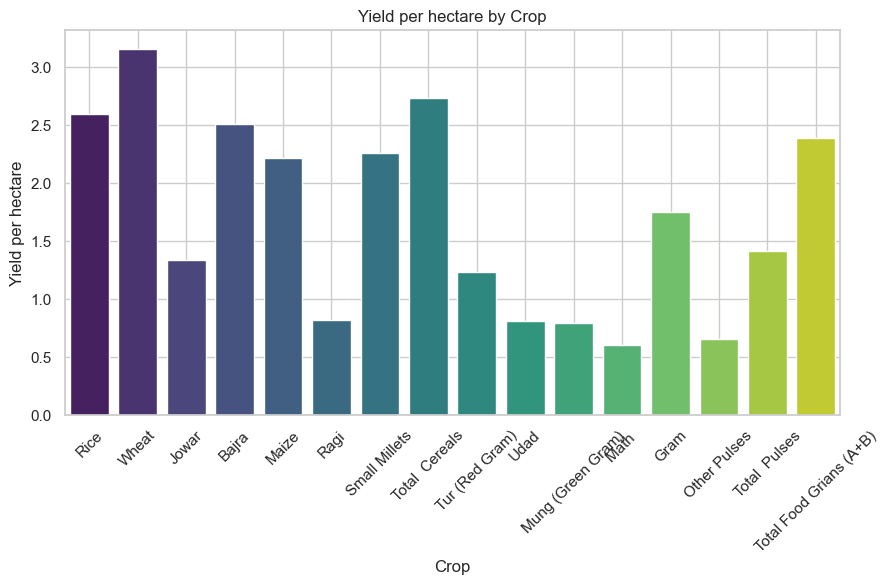

C:\Users\Thout Harshavardhan\AppData\Local\Temp\ipykernel_13924\254574680.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crop_only_df, x='Crop', y='Prod_per_Area', palette='magma')


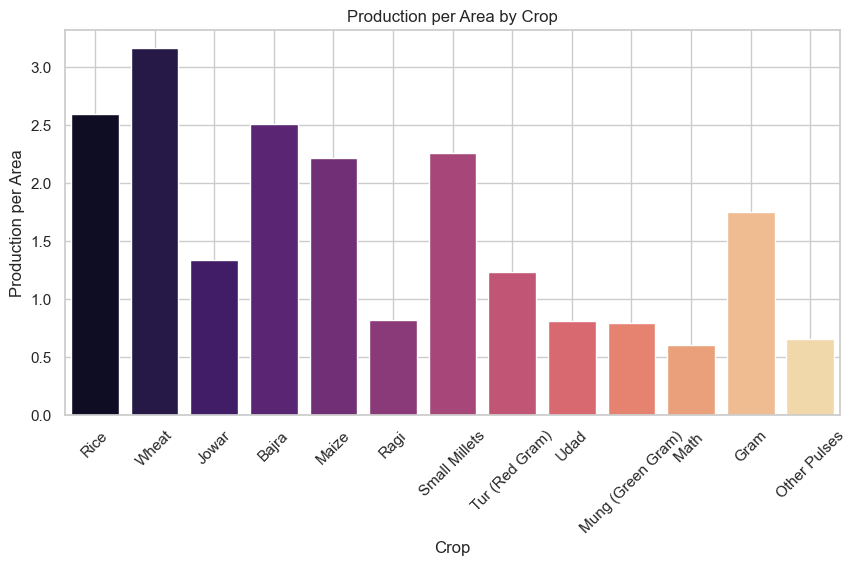

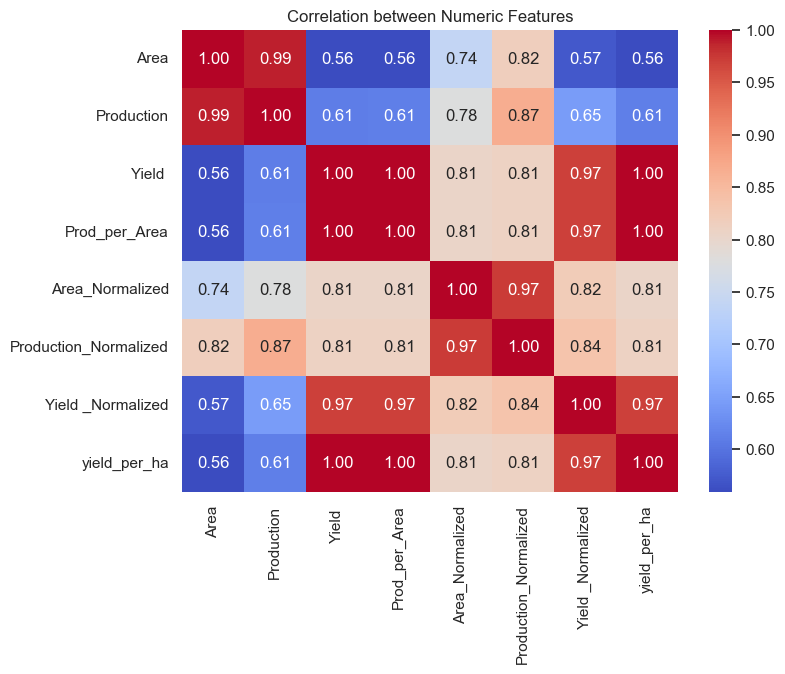

In [ ]:

plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Crop', y='yield_per_ha', palette='viridis')
plt.title('Yield per hectare by Crop')
plt.xlabel('Crop')
plt.ylabel('Yield per hectare')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


crop_only_df = df[~df['Crop'].str.contains("Total")].copy()

crop_only_df['Prod_per_Area'] = crop_only_df['Production'] / crop_only_df['Area']

plt.figure(figsize=(10,5))
sns.barplot(data=crop_only_df, x='Crop', y='Prod_per_Area', palette='magma')
plt.title('Production per Area by Crop')
plt.xlabel('Crop')
plt.ylabel('Production per Area')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation between Numeric Features")
plt.show()
